# Clase 16: Derivadas numéricas

En muchos casos la derivada de una función es fácil de calcular. Sin embargo con frecuencia la función se conoce sólo en algunos puntos (por ejemplo cuando es el resultado de una medición o de una simulación) y los métodos numéricos para tomar derivadas pueden resultar muy útiles.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fórmula de dos puntos

Recordemos la definición de la derivada

$$
f'(x_o) = \lim_{h\rightarrow 0}\frac{f(x_o + h) - f(x_o)}{h}
$$

Podemos entonces tomar un $h$ lo suficientemente pequeño. Para obtener una estimación del error usamos la expansión de Taylor

$$
f(x_o + h) = f(x_o) + h f'(x_o) + \frac{1}{2}h^2 f''(\xi)
$$

tal que

$$
f'(x_o) = \frac{f(x_o + h) - f(x_o)}{h} - \frac{1}{2}h f''(\xi)
$$

El error es entonces

$$
\left|f'(x_o) - \frac{f(x_o + h) - f(x_o)}{h}\right| \leq \frac{h}{2}\,\text{max}_{x\in[x_o, x_o+h]}\,|f''(x)|
$$

In [4]:
def deriv2p(f, x, h):
    return (f(x + h) - f(x))/h

También podríamos haber usado

$$
f'(x_o) = \frac{f(x_o) - f(x_o - h)}{h} + \frac{1}{2}h f''(\xi)
$$

Una manera alternativa de deducir esta fórmula es usando los polinomios de Lagrange. El polinomio de orden uno es

$$
f(x) = f(x_o) L_{1,0}(x) + f(x_1) L_{1,1}(x) + \frac{1}{2}f''(\xi)(x - x_o)(x - x_1)
$$

$$
L_{1,0}(x) = \frac{(x - x_1)}{(x_o - x_1)}\,,\quad L_{1,1}(x) = \frac{(x - x_o)}{(x_1 - x_o)}
$$

Tomando $x_1 = x_o + h$ obtenemos

$$
f(x) = -f(x_o) \frac{(x - x_o - h)}{h} + f(x_1) \frac{(x - x_o)}{h} + \frac{1}{2}f''(\xi)(x - x_o)(x - x_o -h)
$$

tal que

$$
f'(x_o) = \frac{f(x_1) - f(x_o)}{h} - \frac{h}{2}f''(\xi) 
$$

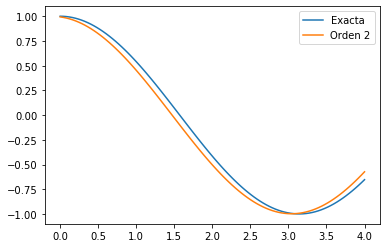

In [5]:
x = np.linspace(0,4,100)
exactas = np.cos(x)
aprox2 = [deriv2p(np.sin, xi, 0.2) for xi in x]

plt.plot(x, exactas, label='Exacta')
plt.plot(x, aprox2, label='Orden 2')
plt.legend()

## Fórmulas de más puntos

Podemos usar los polinomios de Legendre para encontrar fórmulas que involucran más puntos. Estas pueden ser más lentas porque necesitan un mayor número de evaluaciones de la función, pero son más precisas como veremos.

El polinomio de orden dos es

$$
f(x) = f(x_o) L_{2,0}(x) + f(x_1) L_{2,1}(x) + f(x_2) L_{2,2}(x) + \frac{1}{6}f^{(3)}(\xi)(x - x_o)(x - x_1)(x - x_2)
$$

$$
L_{2,0}(x) = \frac{(x - x_1)(x - x_2)}{(x_o - x_1)(x_o - x_2)}\,,\quad L_{2,1}(x) = \frac{(x - x_o)(x - x_2)}{(x_1 - x_o)(x_1 - x_2)}\,,\quad L_{2,2}(x) = \frac{(x - x_o)(x - x_1)}{(x_2 - x_o)(x_2 - x_1)}
$$

Tomando $x_o = x_o - h$, $x_1 = x_o$ y $x_2 = x_o + h$ obtenemos

$$
f(x) = f(x_o - h) \frac{(x - x_o)(x - x_o - h)}{2h^2} - f(x_o) \frac{(x - x_o - h)(x - x_o + h)}{h^2} + f(x_o + h) \frac{(x - x_o + h)(x - x_o)}{2h^2} + \frac{1}{6}f^{(3)}(\xi)(x - x_o)(x - x_o - h)(x - x_o + h)
$$

tal que

$$
f'(x_o) = - f(x_o - h)\frac{h}{2h^2} + f(x_o + h)\frac{h}{2h^2} - \frac{h^2}{6}f^{(3)}(\xi)
$$

simplificando

$$
f'(x_o) =\frac{1}{2h}\left(f(x_o + h) - f(x_o - h)\right) + \frac{h^2}{6}f^{(3)}(\xi)
$$

¡Obtenemos una mayor precisión (error cuadrático) haciendo un número igual de evaluaciones que la fórmula de dos puntos!

In [6]:
def deriv3p(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)

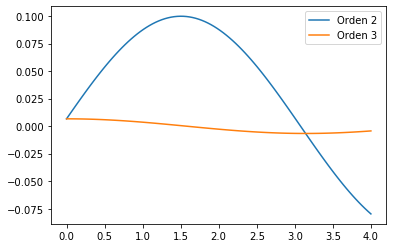

In [8]:
x = np.linspace(0,4,100)
exactas = np.cos(x)
aprox2 = [deriv2p(np.sin, xi, 0.2) for xi in x]
aprox3 = [deriv3p(np.sin, xi, 0.2) for xi in x]

plt.plot(x, exactas - aprox2, label='Orden 2')
plt.plot(x, exactas - aprox3, label='Orden 3')
plt.legend()

Tomando $x_1 = x_o + h$ y $x_2 = x_o + 2h$ obtenemos

$$
f(x) = f(x_o) \frac{(x - x_o - h)(x - x_o - 2h)}{2h^2} - f(x_o + h) \frac{(x - x_o)(x - x_o - 2h)}{h^2} + f(x_o + 2h) \frac{(x - x_o)(x - x_o - h)}{2h^2} + \frac{1}{6}f^{(3)}(\xi)(x - x_o)(x - x_o - h)(x - x_o - 2h)
$$

tal que

$$
f'(x_o) = - f(x_o)\frac{3h}{2h^2} + f(x_o + h) \frac{2h}{h^2} - f(x_o + 2h)\frac{h}{2h^2} + \frac{h^2}{3}f^{(3)}(\xi)
$$

simplificando

$$
f'(x_o) =\frac{1}{2h}\left(- 3f(x_o) + 4f(x_o + h) - f(x_o + 2h)\right) + \frac{h^2}{3}f^{(3)}(\xi)
$$

Esta fórmula sirve para estimar la derivada de una función en los bordes, cuando no conocemos $f(x)$ para $x < x_o$. También se puede usar cuando no conocemos la función para $x > x_o$, en cuyo caso reemplazamos $h \rightarrow -h$. Tiene dos desventajas respecto a la anterior: Necesita tres evaluaciones y el error es aproximadamente el doble.

In [9]:
def deriv3p_extremo(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h))/(2*h)

También podemos usar polinomios de más alto orden para obtener fórmulas de más puntos. Por ejemplo la fórmula de tres puntos tiene un error $(h^4/30)f^{(5)}(\xi)$.

In [10]:
def deriv5p(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h))/(12*h)

In [28]:
def deriv5p_extremo(f, x, h):
    return (-25*f(x) + 48*f(x + h) - 36*f(x + 2*h) + 16*f(x + 3*h) - 3*f(x + 4*h))/(12*h)

De manera análoga se pueden deducir fórmulas para derivadas de más alto orden (que necesitarán una mayor número de evaluaciones). Si consideramos la expansión de Taylor

$$
f(x_o + h) = f(x_o) + f'(x_o)h + \frac{1}{2}f''(x_o)h^2 + \frac{1}{6}f^{(3)}(x_o)h^3 + \frac{1}{24}f^{(4)}(\xi)h^4
$$

de donde vemos que

$$
f(x_o + h) + f(x_o - h) = 2f(x_o) + f''(x_o)h^2 + \frac{1}{12}f^{(4)}(\xi)h^4\,.
$$

y entonces

$$
f''(x_o) = \frac{1}{h^2}\left(f(x_o + h) - 2f(x_o) + f(x_o - h)\right) - \frac{1}{12}f^{(4)}(\xi)h^2
$$

In [11]:
def segunda_deriv(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h))/(h*h)

## Las derivadas numéricas son inestables y ruidosas

Las derivadas numéricas sufren de una inestabilidad respecto a los errores de redondeo. Para verlo consideremos la fórmula a tres puntos y supongamos que el error de redondeo (o un error de la simulación) está acotado por un valor $e$ y $f(x) = \tilde{f}(x) + e(x)$ donde $\tilde{f}$ es el verdadero valor, tal que $e(x) \leq e$. Entonces

$$
\left|f'(x_o) - \frac{1}{2h}\left(f(x_o + h) - f(x_o - h)\right)\right| \leq \left|\frac{1}{2h}(e(x_o + h) - e(x_o - h))\right| + \frac{h^2}{6} M \leq \frac{e}{h} + \frac{h^2}{6} M
$$

¡Al disminuir $h$ aumentamos el primer término de este error!

In [12]:
x = np.arange(0, 4, 0.1)
datos_r = np.sin(x) + np.random.normal(0, 0.05, 40)
datos_e = np.sin(x)

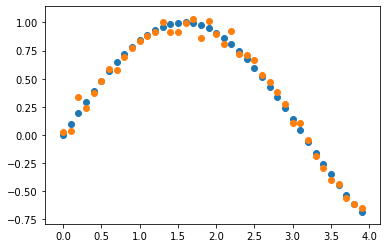

In [13]:
plt.scatter(x, datos_e)
plt.scatter(x, datos_r)

In [57]:

def deriv3_datos(fxo, fx2, h):
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv
    return (fx2 - fxo)/(2*h)

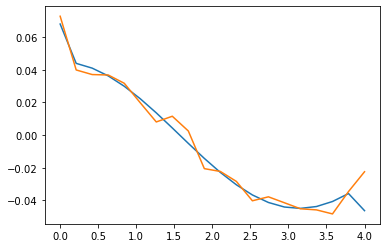

In [80]:
num = 20
x = np.linspace(0, 4, 20)
h = 4/num
datos_e = np.sin(x)
datos_r = np.sin(x) + np.random.normal(0, 0.001, num)
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x))
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x))

## Extrapolación de Richardson

Cuando se conoce la forma del error, se puede intentar combinar diferentes evaluaciones para eliminarlo.

Supongamos que la evaluación numérica $N_1(h)$ de una cierta cantidad $M$ está dada por

$$
M = N_1(h) + K_1 h + K_2 h^2 + ...
$$

Podemos entonces escribir también

$$
M = N_1(h/2) + \frac{1}{2} K_1 h + \frac{1}{4} K_2 h^2 + ...
$$

Usando ambas ecuaciones podemos eliminar el término proporcional a $h$

$$
M = 2N_1(h/2) - N_1(h) - \frac{1}{2} K_2 h^2 + ...
$$

Así obtenemos una nueva aproximación con un error cuadrático

$$
N_2(h) = 2N_1(h/2) - N_1(h)
$$

Se puede proceder de esta forma para obtener

$$
N_j(h) = N_{j - 1}(h/2) + \frac{N_{j-1}(h/2) - N_{j-1}(h)}{2^{j-1} - 1}
$$

Además se puede chequear convergencia cuando $N_{j}(h) - N_{j-1}(h)$ sea menor que un cierto valor.

En muchos casos de interés los errores toman la forma

$$
M = N_1(h) + K_1 h^2 + K_2 h^4 + ...
$$

Podemos entonces escribir también

$$
M = N_1(h/2) + \frac{1}{4} K_1 h^2 + \frac{1}{16} K_2 h^4 + ...
$$

Usando ambas ecuaciones podemos eliminar el término proporcional a $h^2$

$$
3M = 4N_1(h/2) - N_1(h) - \frac{3}{4} K_2 h^4 + ...
$$

Así obtenemos una nueva aproximación con un error cuártico

$$
N_2(h) = \frac{4N_1(h/2) - N_1(h)}{3}
$$

Se puede proceder de esta forma para obtener

$$
N_j(h) = N_{j - 1}(h/2) + \frac{N_{j-1}(h/2) - N_{j-1}(h)}{4^{j-1} - 1}
$$

Además se puede chequear convergencia cuando $N_{j}(h) - N_{j-1}(h)$ sea menor que un cierto valor.

Las fórmulas de derivadas a tres o cinco puntos se pueden deducir como extrapolaciones de este estilo (sólo que evaluadas en puntos distintos de $h/2$). Veremos otro ejemplo interesante en la próxima clase.

## Scipy

Scipy usa la fórmula a tres puntos para la primera derivada, pero además ya tiene programadas derivadas de varios órdenes.

In [1]:
from scipy.misc import derivative

def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)

4.999999999921734

## Tareas

### Tarea 8.6

Los siguientes datos corresponden al cálculo numérico de una cierta propiedad estadística de la distribución de materia en el universo (el espectro de potencias) $P(k)$ en función del modo de Fourier $k$. Use la derivada numérica para encontrar $d\ln P/d\ln k$ en cada punto. Para estimar el error cometido en esta derivada numérica compare el resultado de la fórmula a tres puntos con el resultado de la fórmula a cinco puntos. Será necesario usar las fórmulas a tres y cinco puntos en los extremos que se encuentran en este mismo notebook.

In [30]:
datos = np.array([       [5.531683013105e-04,       1.070304113861e+12], 
       [5.910227121702e-04,       1.139622191891e+12], 
       [6.315688849627e-04,       1.213481232452e+12], 
       [6.750065137883e-04,       1.292169597309e+12], 
       [7.215301959429e-04,       1.375954296780e+12], 
       [7.713235180257e-04,       1.465069697719e+12], 
       [8.245525173319e-04,       1.559705507566e+12], 
       [8.813589235833e-04,       1.659994890361e+12], 
       [9.418537183337e-04,       1.766003776663e+12], 
       [1.006111625261e-03,       1.877722471320e+12], 
       [1.074167130425e-03,       1.995060685935e+12], 
       [1.146012510269e-03,       2.117846703996e+12], 
       [1.221598126720e-03,       2.245831037960e+12], 
       [1.300834972303e-03,       2.378694410099e+12], 
       [1.383599172303e-03,       2.516052095865e+12], 
       [1.469737934874e-03,       2.657475892684e+12], 
       [1.559076324033e-03,       2.802524407596e+12], 
       [1.651424225675e-03,       2.950729179407e+12], 
       [1.746582964833e-03,       3.101618970269e+12], 
       [1.844351177716e-03,       3.254730780491e+12], 
       [1.944529704896e-03,       3.409618695392e+12], 
       [2.046925420592e-03,       3.565860320889e+12], 
       [2.151354028418e-03,       3.723061333248e+12], 
       [2.257641930146e-03,       3.880858018481e+12] ])

### Tarea 8.7

Encuentre la separación óptima entre puntos para el ejemplo con ruido hecho en clase.

### Tarea 8.8

A partir de la fórmula de tres puntos para la derivada en el extremo, asumiendo que esta tiene un error del tipo

$$
M = N_1(h) + K_1 h^2 + K_2 h^4 + ...
$$

use la extrapolación de Richardson para mejorar la aproximación. Escriba un código usando esta nueva fórmula y compárela con las fórmulas a tres y cinco puntos en los extremos introducidas en clase actuando sobre alguna función sencilla y comparando los errores de las tres.

### Tarea 8.9

En clase introducimos una fórmula para la segunda derivada usando tres evaluaciones de la función. Use la expansión en Taylor de $f(x_o + h)$, $f(x_o - h)$, $f(x_o + 2h)$ y $f(x_o - 2h)$ para encontrar una fórmula para la segunda derivada con cinco evaluaciones y estime el error cometido (la potencia de $h$).

### Tarea 8.10

Considere los siguientes datos que son el resultado de cinco simulaciones muy costosas. Estime la derivada de $n$ respecto a $\sigma$ así como el error cometido. 

| $\sigma$ |          $n$            |
|----------|-------------------------|
| $0.75$   | $1.1324\times 10^{-3}$  |
| $0.77$   | $1.1376\times 10^{-3}$  |
| $0.79$   | $1.1386\times 10^{-3}$  |
| $0.81$   | $1.1454\times 10^{-3}$  |
| $0.83$   | $1.1474\times 10^{-3}$  |

Para estimar el error use la fórmula de error junto con una expresión a cinco puntos para la tercera derivada. Además considere el error de $n$ ($\Delta n = 10^{-6}$).

Para encontrar una expresión para la tercera derivada use la expansión en Taylor de $f(x_o + h)$, $f(x_o - h)$, $f(x_o + 2h)$ y $f(x_o - 2h)$.